In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sarracen as src
import numpy as np

/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/cubic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/st2/jjnarvaezcor/virtual-env/lib/python3.8/site-packages/sarracen/kernels/quartic_spline.py:15: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
/users/labnet/

# 3D Init Setup

In [2]:
n = 16**3
dm = 1./n
eta = 1.2 

In [3]:
sdf_ini = src.read_csv('../Data/initial_distribution/sedov_blast_wave.csv')
sdf_ini.params={'mass':dm, 'hfact':eta}
sdf_ini.calc_density()

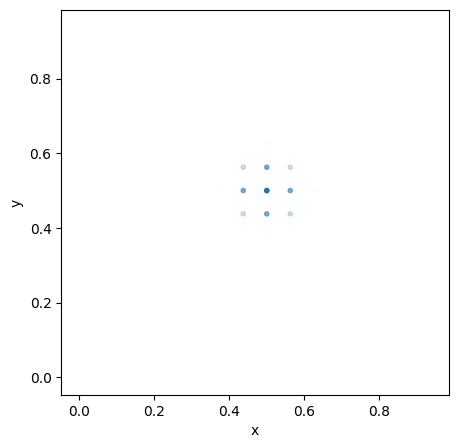

In [4]:
fig, ax = plt.subplots(figsize=(5,5))

alph = "u"
x1="x"
x2="y"

ax.scatter(sdf_ini[x1], sdf_ini[x2], marker=".", alpha=sdf_ini[alph]/np.max(sdf_ini[alph]))

ax.set_xlabel(x1)
ax.set_ylabel(x2)

plt.show()

In [5]:
print(f"U_tot = {dm*np.sum(sdf_ini['u'])}")

U_tot = 1.0000000000000004


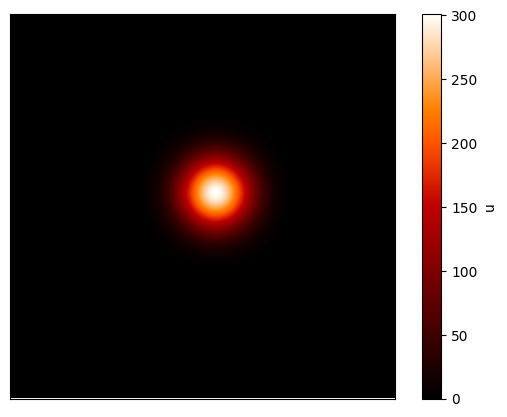

In [6]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf_ini.render('u', xsec=0.5, ax=ax, rotation=[0,0,0])

# Final Setup

In [60]:
sdf = src.read_csv('../Data/results/sedov_blast_wave/final.csv')
sdf.params={'mass':dm, 'hfact':eta}
sdf.calc_density()
sdf

,x,y,z,vx,vy,vz,h,u,rho
0,0.0000,1.0000,0.0000,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.074979,0.000000e+00,1.000825
1,0.0625,0.0000,0.0000,-4.103200e-12,0.000000e+00,0.000000e+00,0.074979,2.000000e-16,1.000825
2,0.1250,0.0000,0.0000,-1.705982e-10,0.000000e+00,0.000000e+00,0.074979,6.640000e-14,1.000825
3,0.1875,0.0000,0.0000,-3.026437e-09,-0.000000e+00,-0.000000e+00,0.074979,6.043300e-12,1.000826
4,0.2500,1.0000,1.0000,-2.587186e-08,-0.000000e+00,-0.000000e+00,0.074979,1.991581e-10,1.000828
...,...,...,...,...,...,...,...,...,...
4091,0.6875,0.9375,0.9375,2.384324e-05,4.991338e-05,4.991338e-05,0.074972,5.746285e-06,1.001123
4092,0.7500,0.9375,0.9375,7.152507e-06,1.162636e-05,1.162636e-05,0.074977,7.677987e-07,1.000924
4093,0.8125,0.9375,0.9375,1.249648e-06,1.655873e-06,1.655873e-06,0.074979,5.018142e-08,1.000848
4094,0.8750,0.9375,0.9375,1.180446e-07,1.332586e-07,1.332586e-07,0.074979,1.423741e-09,1.000829


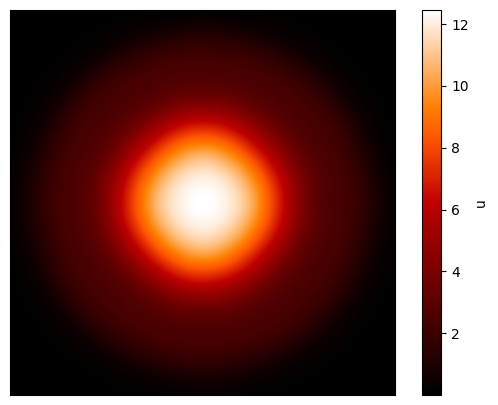

In [61]:
fig, ax = plt.subplots(figsize=(7,5))
ax = sdf.render('u', xsec=0.5, ax=ax, rotation=[0,0,0])

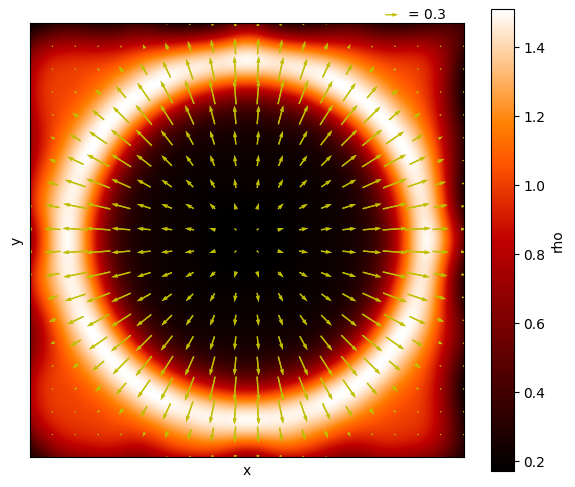

In [62]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sdf.render('rho', xsec=0.5, ax=ax, rotation=[0,0,0])
ax = sdf.arrowplot(['vx', 'vy', 'vz'], color='y')

# Final Setup

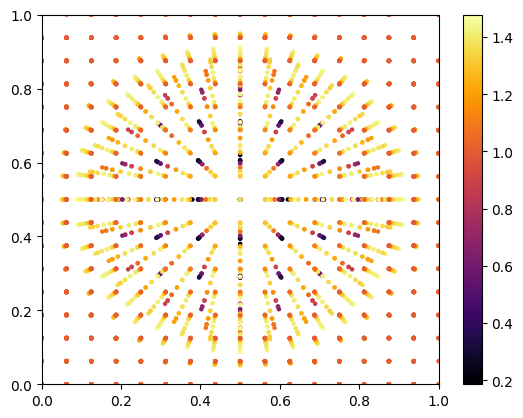

In [10]:
plt.scatter(sdf['x'], sdf['y'], c=sdf['rho'], cmap='inferno', s=5)
# Add a colorbar
plt.colorbar()
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# Conservation's Laws

In [11]:
# Angular Momentum
def angular_momentum(x, y, z, vx, vy, vz):
    lx = y*vz - z*vy
    ly = z*vx - x*vz
    lz = x*vy - y*vx
    return lx, ly, lz

In [63]:
T = 35
time = range(0, T)
ang_mom = np.zeros(T)
lin_mom = np.zeros(T)
energ = np.zeros(T)

for ii in range(1, T+1):
    df = src.read_csv('../Data/results/sedov_blast_wave/' + str(ii) + ".csv")
    L = np.sum(angular_momentum(df['x'], df['y'], df['z'], df['vx'], df['vy'], df['vz']), axis=1)
    ang_mom[ii-1] = np.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
    vx = np.sum(df['vx'])
    vy = np.sum(df['vy'])
    vz = np.sum(df['vz'])
    lin_mom[ii-1] = np.sqrt(vx*vx + vy*vy + vz*vz)
    energ[ii-1] = 0.5*lin_mom[ii-1] + np.sum(df['u'])

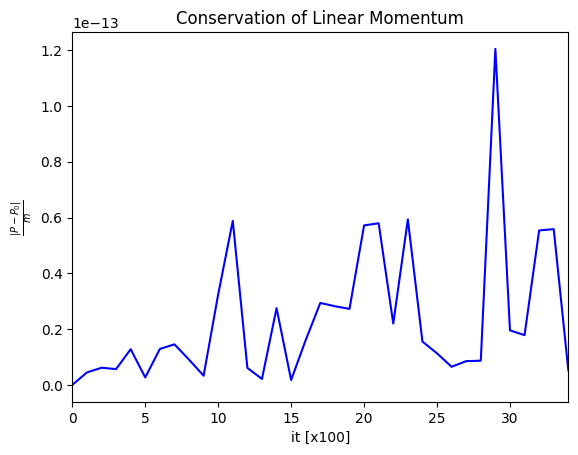

In [64]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

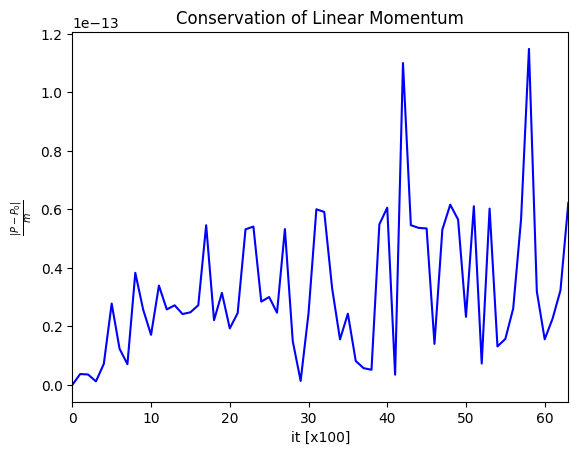

In [23]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

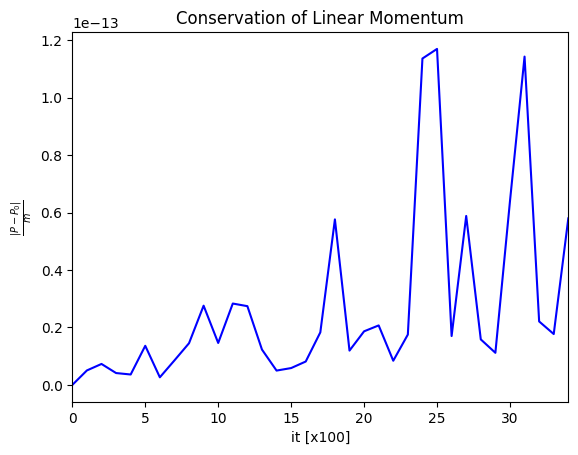

In [30]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

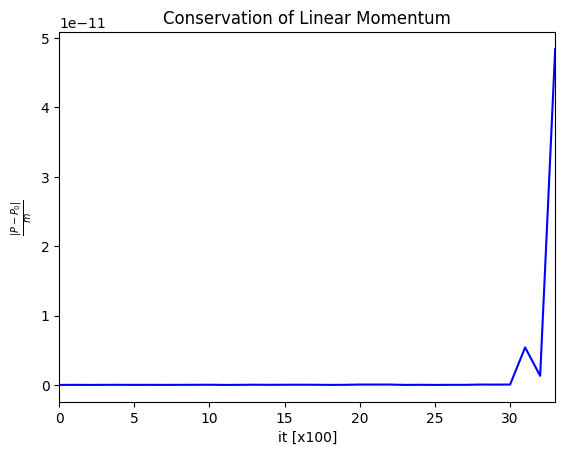

In [46]:
plt.plot(time[:], np.abs(lin_mom[:]-lin_mom[0]), '-', color='blue')
plt.title("Conservation of Linear Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|P-P_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

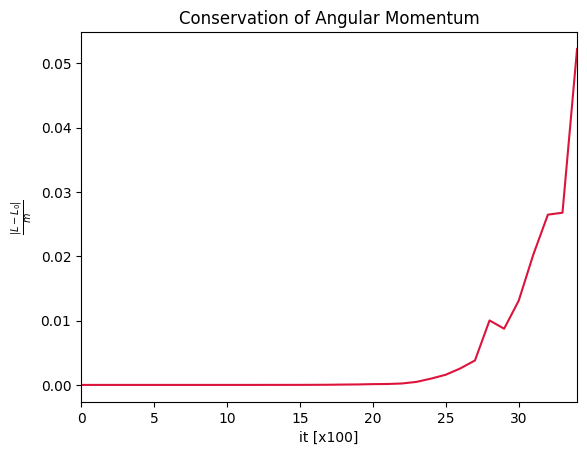

In [65]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

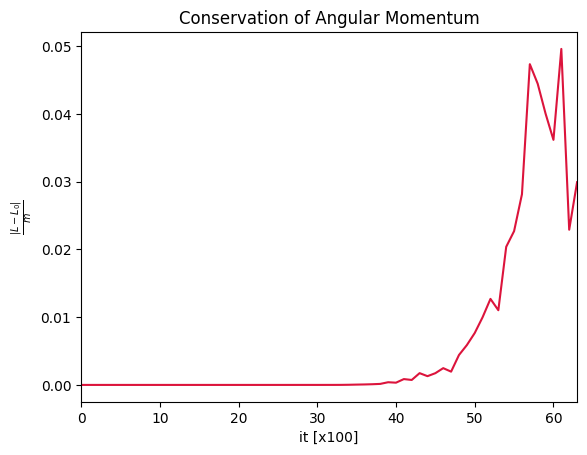

In [24]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

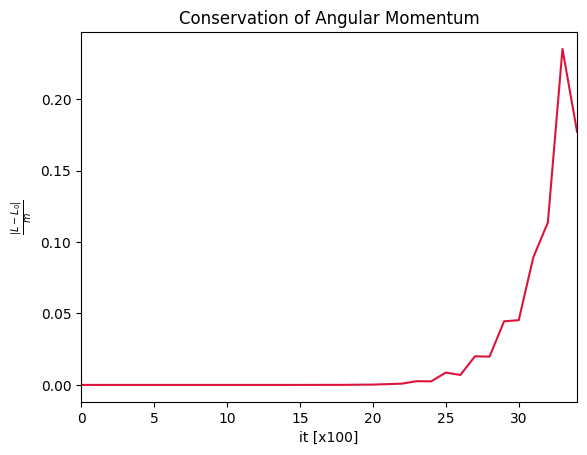

In [31]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

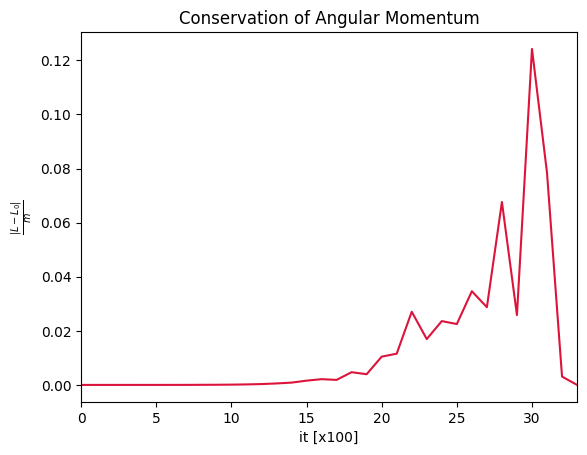

In [47]:
plt.plot(time[:], np.abs(ang_mom[:]-ang_mom[0]), '-', color='crimson')
plt.title("Conservation of Angular Momentum")
plt.xlabel("it [x100]")
plt.ylabel(r"$\frac{|L-L_0|}{m}$")
plt.xlim(0, T-1)
plt.show()

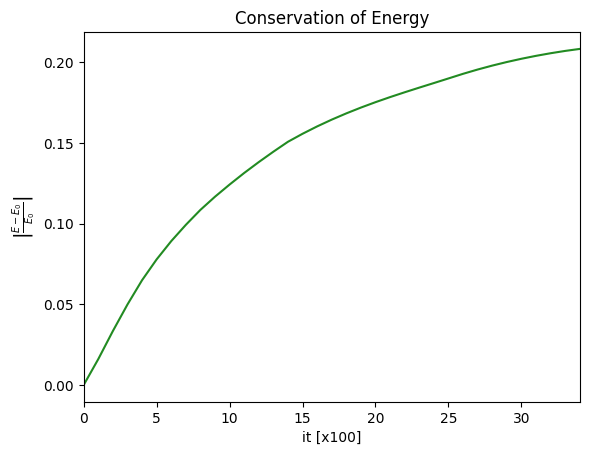

In [66]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

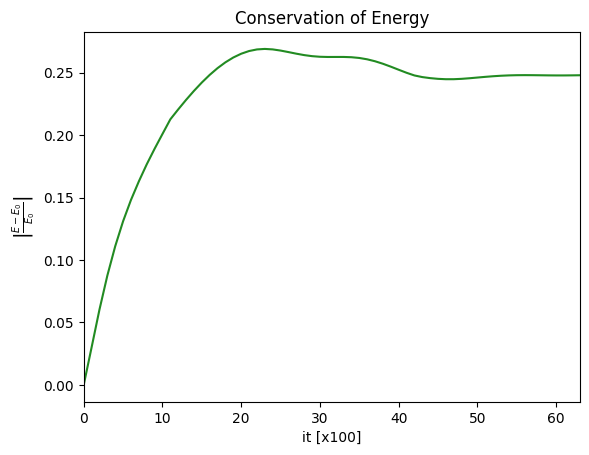

In [25]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

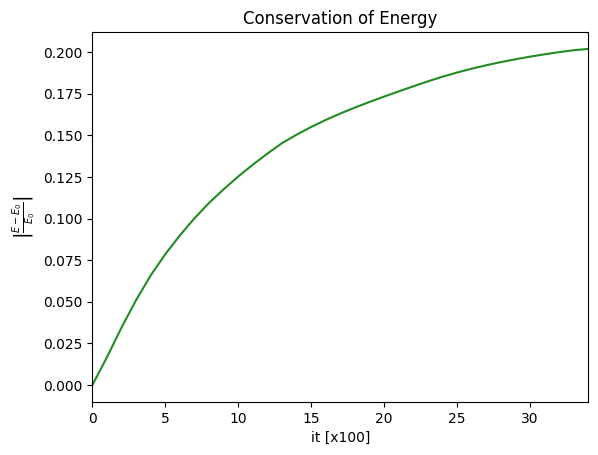

In [32]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

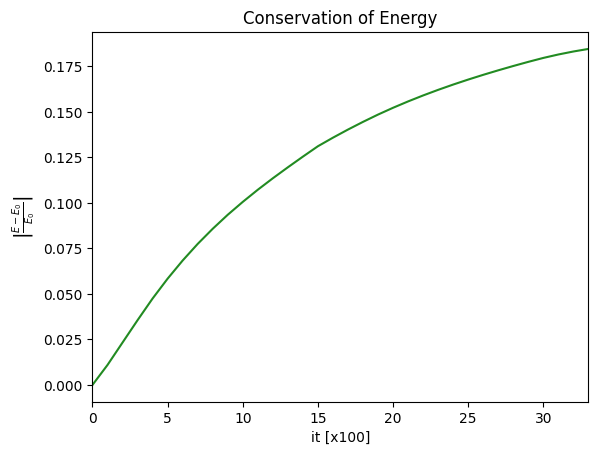

In [48]:
plt.plot(time[:], np.abs((energ[:]-energ[0])/energ[0]), '-', color='forestgreen')
plt.title("Conservation of Energy")
plt.xlabel("it [x100]")
plt.ylabel(r"$\left|\frac{E-E_0}{E_0}\right|$")
plt.xlim(0, T-1)
plt.show()

# Density distribution

In [67]:
rad = np.sqrt((sdf["x"]-0.5)**2 + (sdf["y"]-0.5)**2+(sdf["z"]-0.5)**2)
wf = 1.1527*(0.08)**(0.4)

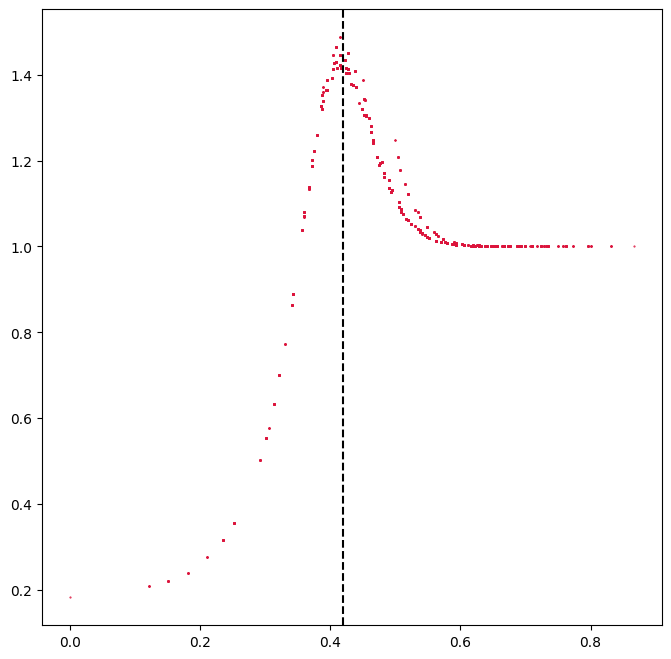

In [68]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, sdf['rho'], ".", color="crimson", markersize=1)
plt.axvline(x=wf, ls='--', c='k')
plt.show()

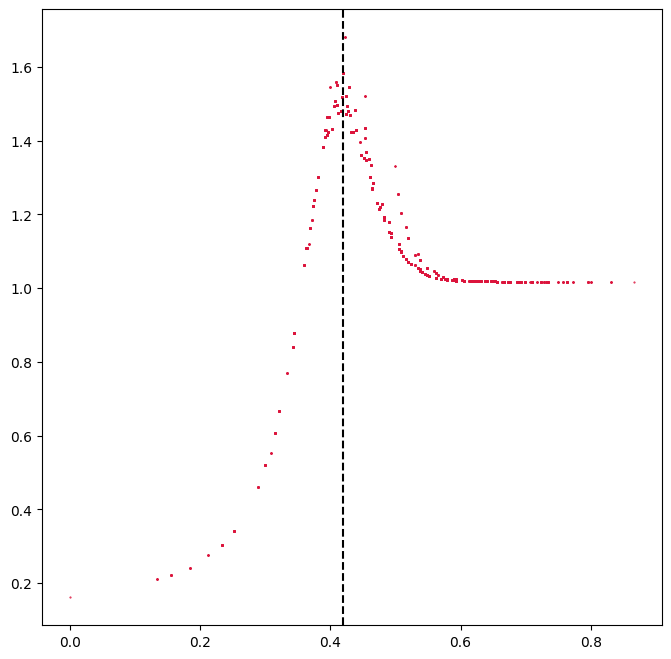

In [34]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, sdf['rho'], ".", color="crimson", markersize=1)
plt.axvline(x=wf, ls='--', c='k')
plt.show()

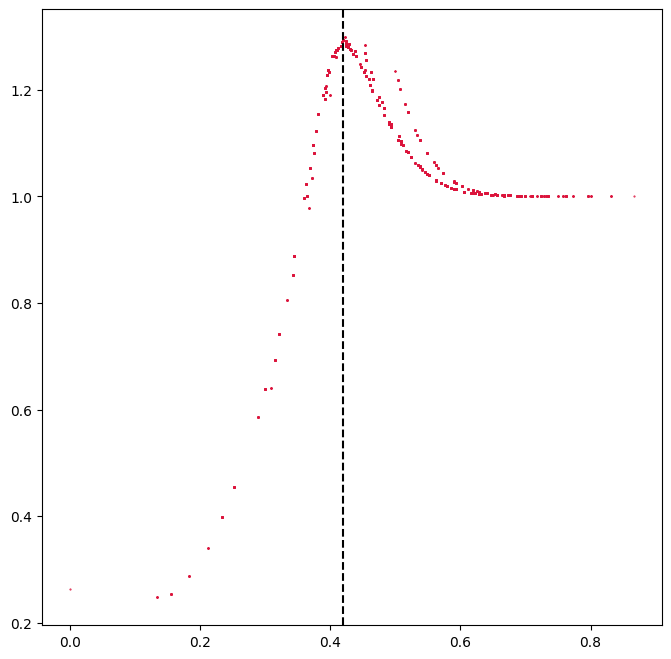

In [49]:
fig = plt.figure(figsize=(8,8))
plt.plot(rad, sdf['rho'], ".", color="crimson", markersize=1)
plt.axvline(x=wf, ls='--', c='k')
plt.show()

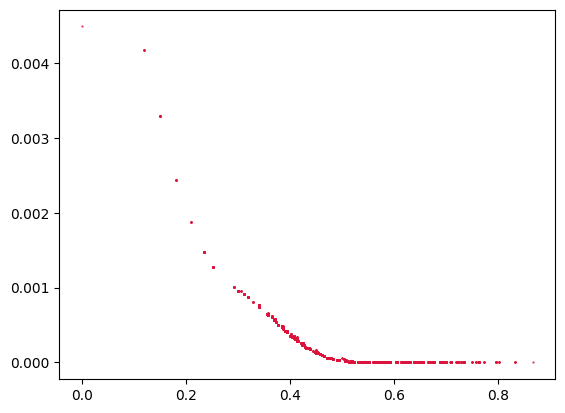

In [18]:
plt.plot(rad, dm*sdf['u'], ".", color="crimson", markersize=1)
plt.show()